In [2]:
from pydeeprecsys.rl.manager import CartpoleManager
from numpy.random import RandomState
from pydeeprecsys.rl.agents.rainbow import RainbowDQNAgent
from pydeeprecsys.rl.learning_statistics import LearningStatistics
from pydeeprecsys.rl.agents.reinforce import ReinforceAgent
from pydeeprecsys.rl.agents.soft_actor_critic import SoftActorCritic

Training...
Episode 104 Mean Rewards 50.63 Last Reward 136.00		Reward threshold reached


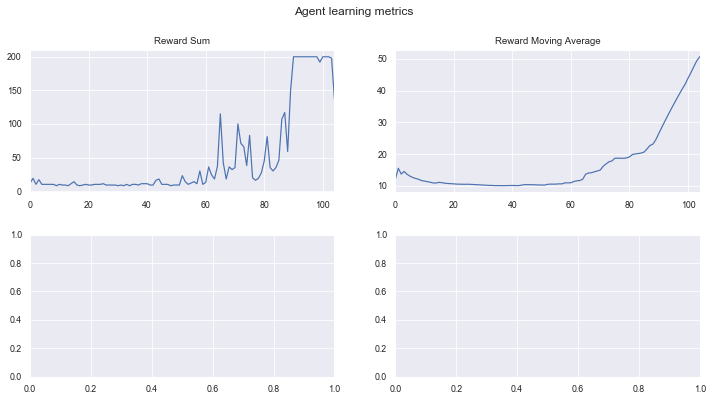

In [4]:
manager = CartpoleManager()
random_state = RandomState(42)
input_size = (manager.env.observation_space.shape[0])
output_size = manager.env.action_space.n
agent = RainbowDQNAgent(
    input_size,
    output_size,
    network_update_frequency=5,
    network_sync_frequency=20,
    batch_size=16,
    learning_rate=0.001,
    discount_factor=0.95,
    buffer_size=10000,
    buffer_burn_in=32,
    random_state=random_state,
)
learning_statistics = LearningStatistics()
manager.train(agent, max_episodes=500, statistics=learning_statistics)
learning_statistics.plot_learning_stats()

Training...
Episode 379 Mean Rewards 50.31 Last Reward 90.00		Reward threshold reached


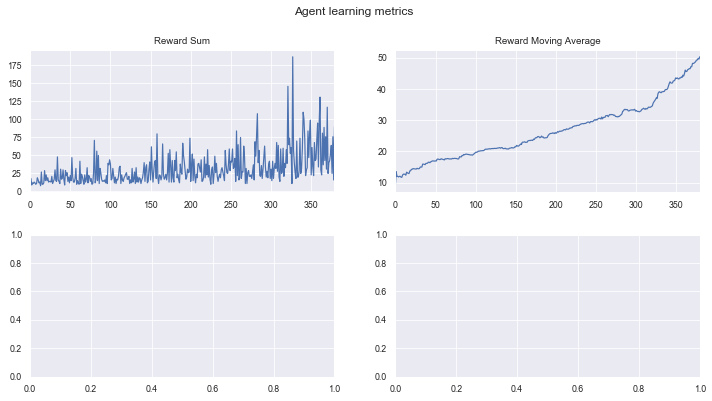

In [5]:
manager = CartpoleManager()
agent = ReinforceAgent(state_size=input_size, n_actions=output_size, discount_factor=0.95, learning_rate=0.001)
learning_statistics = LearningStatistics()
manager.train(agent, max_episodes=500, statistics=learning_statistics)
learning_statistics.plot_learning_stats()

Training...
Episode 107 Mean Rewards 50.42 Last Reward 150.00		Reward threshold reached


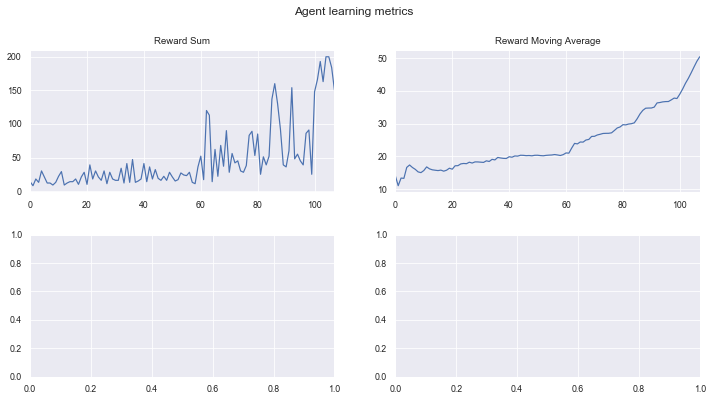

In [6]:
from pydeeprecsys.rl.agents.actor_critic import ActorCriticAgent
manager = CartpoleManager()
agent = ActorCriticAgent(state_size=input_size, n_actions=output_size, discount_factor=0.95, learning_rate=0.001)
learning_statistics = LearningStatistics()
manager.train(agent, max_episodes=500, statistics=learning_statistics)
learning_statistics.plot_learning_stats()

Training...
Episode 99 Mean Rewards 50.14 Last Reward 200.00		Reward threshold reached


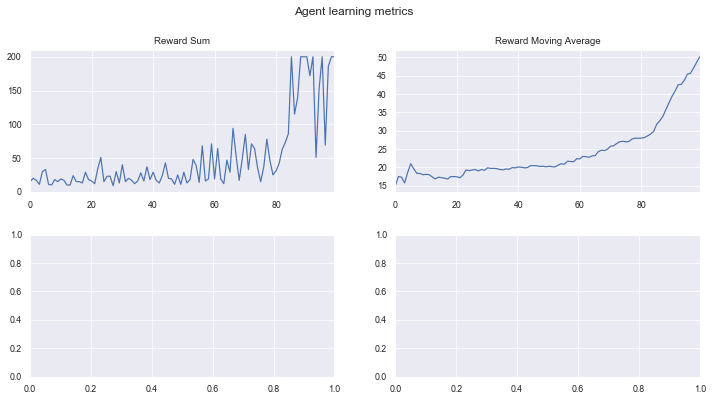

In [5]:
manager = CartpoleManager()
random_state = RandomState(42)
input_size = manager.env.observation_space.shape[0]
output_size = manager.env.action_space.n
agent = SoftActorCritic(action_space=manager.env.action_space, state_size=input_size, 
    discount_factor=0.95,
    learning_rate=0.001,
    timesteps_to_start_predicting=64,
    target_update_interval=1)
learning_statistics = LearningStatistics()
manager.train(agent, max_episodes=500, statistics=learning_statistics)
learning_statistics.plot_learning_stats()